In [1]:
# Student Performance Prediction

#Objective
#To analyze student academic data and build a machine learning model
#that predicts a student's final performance score based on study habits,
#attendance, and class participation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/Lenovo/Desktop/student-performance-project/data/student_data.csv")

# Show first 5 rows
data.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [4]:
# Dataset shape (rows, columns)
data.shape


(1000000, 6)

In [5]:
# Column names
data.columns


Index(['student_id', 'weekly_self_study_hours', 'attendance_percentage',
       'class_participation', 'total_score', 'grade'],
      dtype='object')

In [6]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [7]:
# Drop student_id column
data = data.drop(columns=['student_id'])

data.head()


,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,18.5,95.6,3.8,97.9,A
1,14.0,80.0,2.5,83.9,B
2,19.5,86.3,5.3,100.0,A
3,25.7,70.2,7.0,100.0,A
4,13.4,81.9,6.9,92.0,A


In [8]:
data.describe()



,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,15.029127,84.711046,5.985203,84.283845
std,6.899431,9.424143,1.956421,15.432969
min,0.000000,50.000000,0.000000,9.400000
25%,10.300000,78.300000,4.700000,73.900000
50%,15.000000,85.000000,6.000000,87.500000
75%,19.700000,91.800000,7.300000,100.000000
max,40.000000,100.000000,10.000000,100.000000


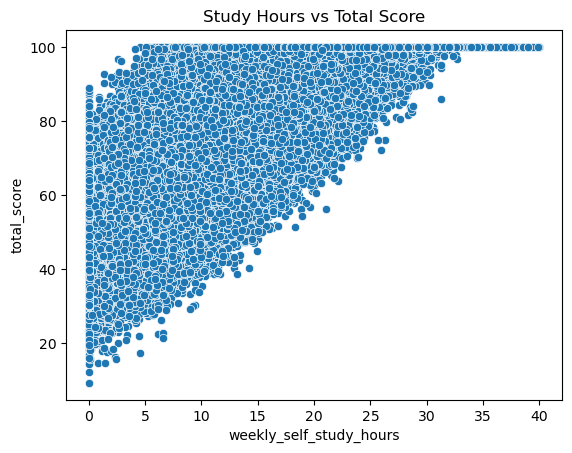

In [9]:
sns.scatterplot(
    x='weekly_self_study_hours',
    y='total_score',
    data=data
)
plt.title("Study Hours vs Total Score")
plt.show()


In [10]:
# Features and target
X = data[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
y = data['total_score']

X.head(), y.head()


(   weekly_self_study_hours  attendance_percentage  class_participation
 0                     18.5                   95.6                  3.8
 1                     14.0                   80.0                  2.5
 2                     19.5                   86.3                  5.3
 3                     25.7                   70.2                  7.0
 4                     13.4                   81.9                  6.9,
 0     97.9
 1     83.9
 2    100.0
 3    100.0
 4     92.0
 Name: total_score, dtype: float64)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((800000, 3), (200000, 3))

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(7.1613334767299985, 0.6600425865640976)

In [14]:
# Check feature importance (coefficients)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

importance


,Feature,Coefficient
0,weekly_self_study_hours,1.816820
1,attendance_percentage,0.000402
2,class_participation,-0.002756


In [15]:
# New student data
# [weekly_self_study_hours, attendance_percentage, class_participation]

new_student = pd.DataFrame({
    'weekly_self_study_hours': [18],
    'attendance_percentage': [90],
    'class_participation': [6]
})

new_student


,weekly_self_study_hours,attendance_percentage,class_participation
0,18,90,6


In [16]:
predicted_score = model.predict(new_student)
predicted_score


array([89.67594178])

In [17]:
print(f"Predicted Total Score: {predicted_score[0]:.2f}")


Predicted Total Score: 89.68
